<a href="https://colab.research.google.com/github/bobbypaton/bobbypaton/blob/main/solubility_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Computationally predicting molecular solubility is useful for drug-discovery.

In this tutorial, we will fit a simple statistical model that predicts the solubility of some organic molecules. The process of fitting this model involves four steps:

1. Loading a chemical dataset, consisting of a series of compounds along with aqueous solubility measurements.
2. Visualizing the molecules
3. Transforming each compound into a feature vector comprehensible to statistical learning methods.
4. Fitting a simple model that maps feature vectors to estimates of aqueous solubility.
5. Visualizing the results

In [1]:
import sys
sys.version

'3.7.10 (default, May  3 2021, 02:48:31) \n[GCC 7.5.0]'

In [2]:
!time pip install rdkit-pypi

     |████████████████████████████████| 18.6MB 1.7MB/s 

real	0m8.062s
user	0m4.684s
sys	0m1.203s


In [3]:
# import python modules
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import sklearn, sys
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from rdkit import Chem
import rdkit

We need to load a dataset of estimated aqueous solubility measurements [1] into our notebook. The data is in CSV format and contains SMILES strings, measured aqueous solubilities, and other descriptors.

In [33]:
solubility_data = pd.read_csv("https://raw.githubusercontent.com/deepchem/deepchem/master/datasets/delaney-processed.csv")
solubility_data = solubility_data[['Compound ID', 'smiles', 'measured log solubility in mols per litre', 'Molecular Weight', 'Minimum Degree']]
solubility_data.head()

,Compound ID,smiles,measured log solubility in mols per litre,Molecular Weight,Minimum Degree
0,Amigdalin,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,-0.77,457.432,1
1,Fenfuram,Cc1occc1C(=O)Nc2ccccc2,-3.30,201.225,1
2,citral,CC(C)=CCCC(C)=CC(=O),-2.06,152.237,1
3,Picene,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,-7.87,278.354,2
4,Thiophene,c1ccsc1,-1.33,84.143,2


Let's take a look at some of the molecules in our dataset!



/usr/local/lib/python3.7/dist-packages/rdkit/Chem/Draw/IPythonConsole.py:192: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


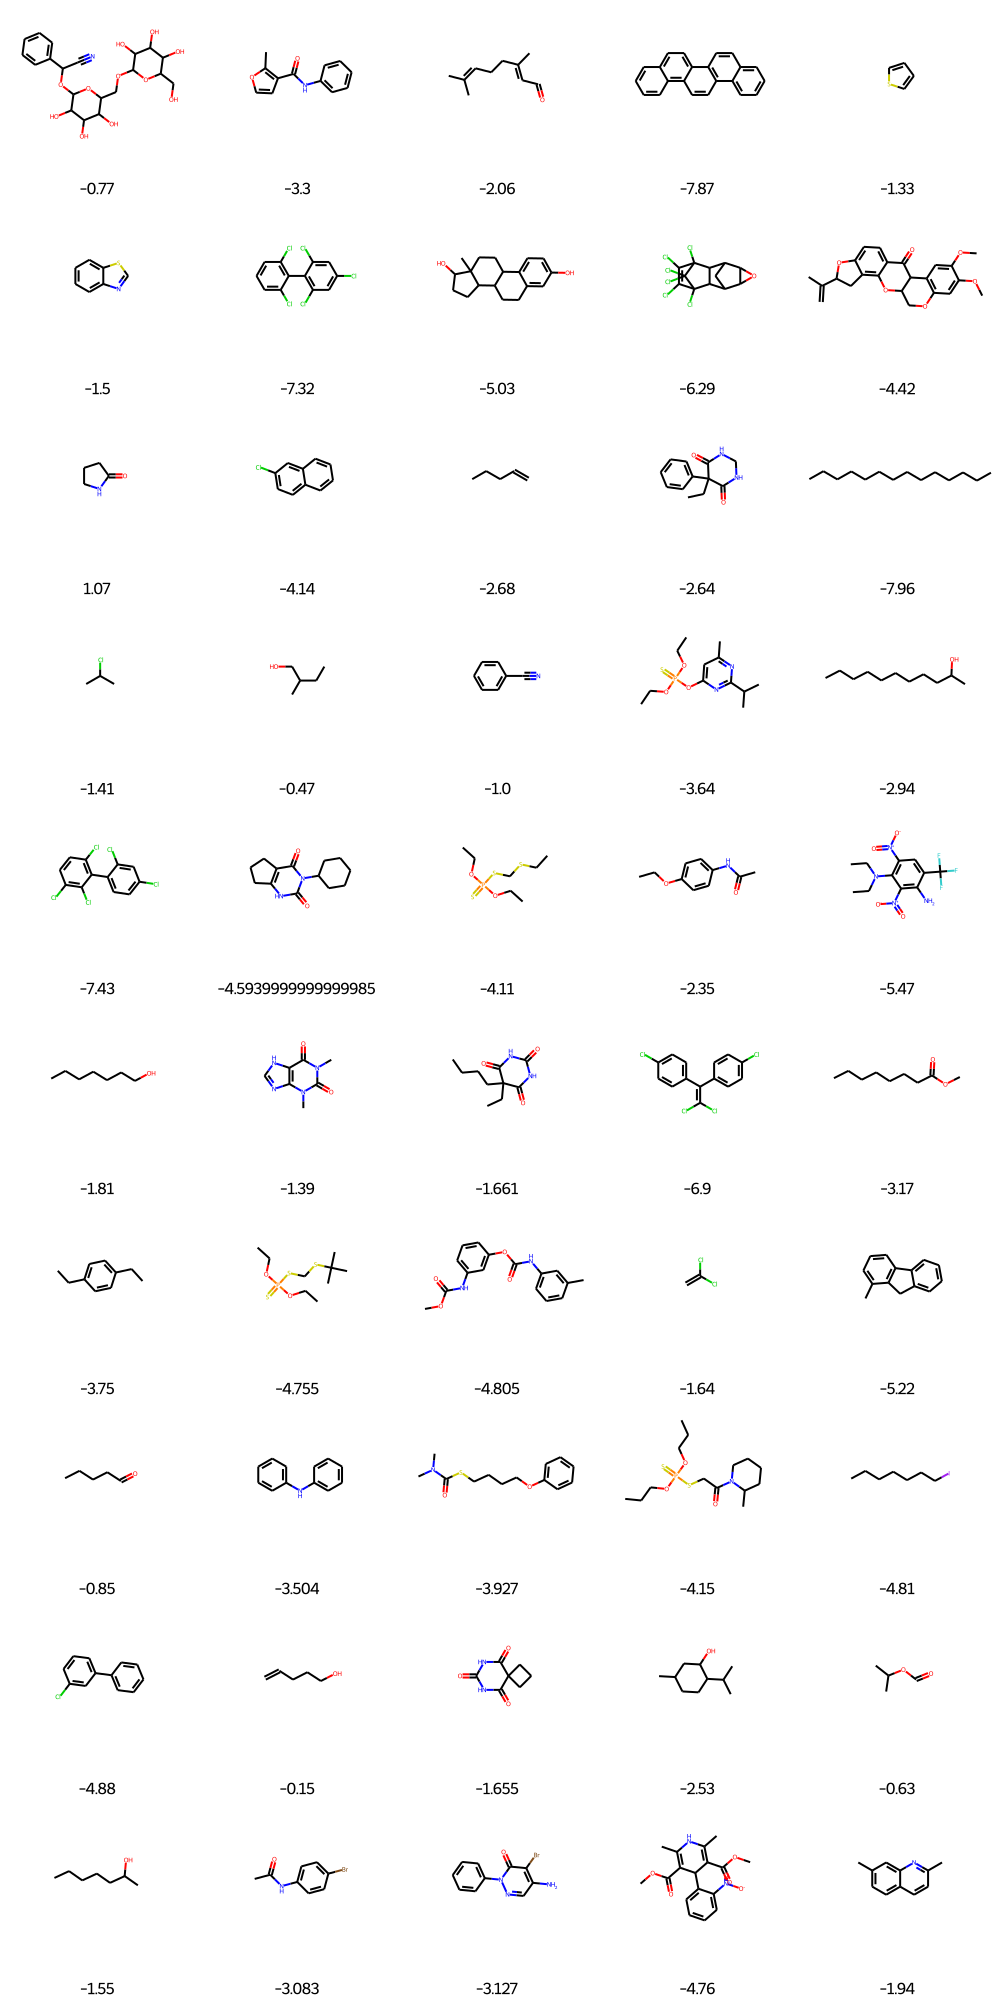

In [30]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True

molecules = [Chem.MolFromSmiles(smi) for smi in solubility_data['smiles']]
Draw.MolsToGridImage(molecules, molsPerRow=5, legends=[str(sol) for sol in solubility_data['measured log solubility in mols per litre']])

Which are the most and least soluble compounds in our dataset?

In [56]:
solubility_data['measured log solubility in mols per litre'].max()

1.58

In [57]:
solubility_data['measured log solubility in mols per litre'].idxmax()

605

In [59]:
solubility_data.loc[603]

Compound ID                                                       2,2',3,3',4,4',5,5',6,6'-PCB
smiles                                       Clc1c(Cl)c(Cl)c(c(Cl)c1Cl)c2c(Cl)c(Cl)c(Cl)c(C...
measured log solubility in mols per litre                                                -11.6
Molecular Weight                                                                       498.662
Minimum Degree                                                                               1
Name: 603, dtype: object

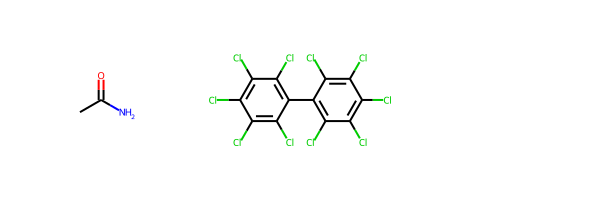

In [62]:
smiles = [solubility_data.loc[605]['smiles'], solubility_data.loc[603]['smiles']]
molecules = [Chem.MolFromSmiles(smi) for smi in smiles]
Draw.MolsToGridImage(molecules)

Does solubility correlate with molecular structure?

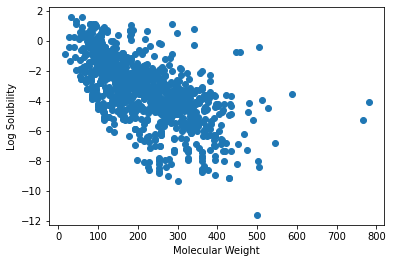

In [63]:
X = solubility_data['Molecular Weight']
Y = solubility_data['measured log solubility in mols per litre']

plt.scatter(X, Y)
plt.xlabel("Molecular Weight")
plt.ylabel("Log Solubility")
plt.show()

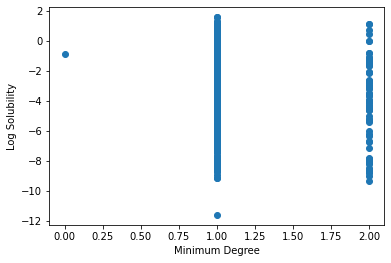

In [41]:
X = solubility_data['Minimum Degree']
Y = solubility_data['measured log solubility in mols per litre']

plt.scatter(X, Y)
plt.xlabel("Minimum Degree")
plt.ylabel("Log Solubility")
plt.show()